In [57]:
import matplotlib.pyplot as plt

In [58]:

import pandas as pd
import seaborn as sns

In [59]:

import os
os.environ['KAGGLE_USERNAME']='sheetalimaity'
os.environ['KAGGLE_KEY']='8a2671c6eb5ab28df104e99d737eecea'

In [60]:

! kaggle datasets download -d uciml/breast-cancer-wisconsin-data

breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [61]:

! unzip /content/breast-cancer-wisconsin-data.zip

Archive:  /content/breast-cancer-wisconsin-data.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [62]:

df= pd.read_csv( '/content/data.csv')

In [63]:

df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [64]:

df.shape



(569, 33)

In [65]:

df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [66]:

df.dropna(axis=1,inplace=True)

In [67]:

df.shape

(569, 32)

In [68]:
#number of M or B cells in diagnosis
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# Label Encoding

In [69]:

df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [70]:

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df.iloc[:,1]=labelencoder.fit_transform(df.iloc[:,1].values)


<ipython-input-70-1d924e3b0624>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1]=labelencoder.fit_transform(df.iloc[:,1].values)


In [71]:

df


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Split Dataset & Feature Scaling

In [72]:

x=df.iloc[:,2:].values 
y=df.iloc[:,1].values   

In [73]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [74]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.fit_transform(x_test)


In [75]:

x_train

array([[ 2.72955395,  1.77054419,  2.90288457, ...,  2.41008056,
         0.45201674,  0.1482797 ],
       [ 1.81300108,  1.80854667,  1.81415263, ...,  1.51935482,
         0.57175419, -0.47603266],
       [ 0.24092012,  0.78723005,  0.44891734, ...,  2.01454314,
        -0.09254259,  1.6886185 ],
       ...,
       [-0.31968988,  0.71360025, -0.41904395, ..., -1.63790765,
        -1.02911903, -1.46443515],
       [-0.41164179, -1.67343046, -0.46786407, ..., -0.51904267,
        -0.24180433,  0.53612684],
       [ 1.22569537, -0.08207666,  1.16609791, ...,  0.94291269,
        -0.18111549, -0.16332399]])

#Logistic Regression 

In [76]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(x_train,y_train)


LogisticRegression()

In [77]:

predictions_lr= classifier.predict(x_test)

In [78]:
print(y_test)

[0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0]


In [79]:
print(predictions_lr)

[0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0]


In [80]:
#accuracy score(logistic regression)
from sklearn.metrics import accuracy_score

print (accuracy_score(y_test,predictions_lr))

0.9790209790209791


#Confusion Matrix(LR)

[[93  1]
 [ 2 47]]


Text(0.5, 1.0, 'Confusion Matrix(Logistics Regression)')

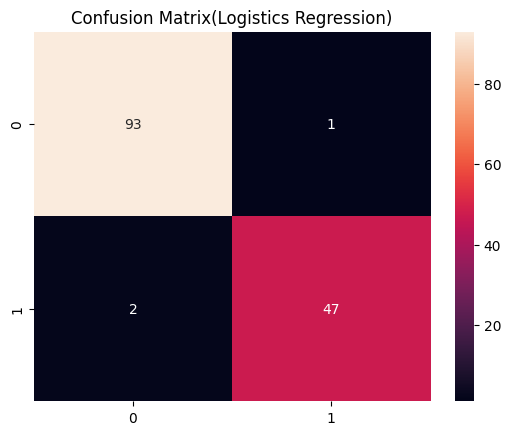

In [81]:

from sklearn.metrics import  confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test,predictions_lr)
print(cm)
sns.heatmap(cm,annot=True).set_title("Confusion Matrix(Logistics Regression)")


#Random Forest


In [82]:
from sklearn.ensemble import RandomForestClassifier


In [83]:
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(x_train, y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

In [84]:
predictions_rf= rf.predict(x_test)

In [85]:
#accuracy score(RF)
print (accuracy_score(y_test,predictions_rf))


0.9440559440559441


#Confusion Matrix(RF)

[[90  4]
 [ 4 45]]


Text(0.5, 1.0, 'Confusion Matrix(Random Forest Classifier)')

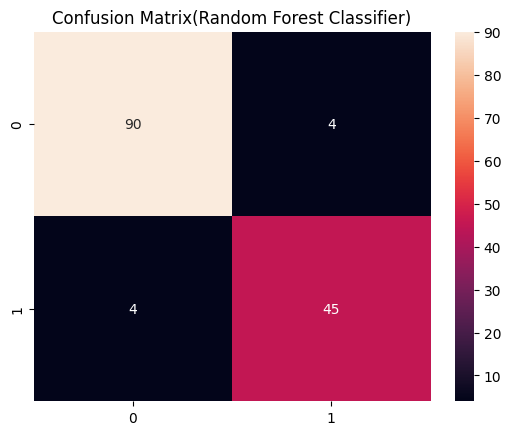

In [86]:
cm_rf=confusion_matrix(y_test,predictions_rf)
print(cm_rf)
sns.heatmap(cm_rf,annot=True).set_title("Confusion Matrix(Random Forest Classifier)")


#Naive Bayes

In [87]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [88]:
predictions_nb= nb.predict(x_test)

In [89]:
#accuracy score(NB)
print (accuracy_score(y_test,predictions_nb))

0.958041958041958


#Confusion Matrix(NB)

[[92  2]
 [ 4 45]]


Text(0.5, 1.0, 'Confusion Matrix(Naive Bayes)')

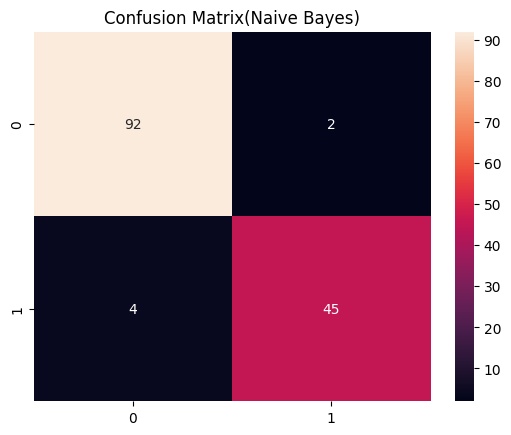

In [90]:
cm_nb=confusion_matrix(y_test,predictions_nb)
print(cm_nb)
sns.heatmap(cm_nb,annot=True).set_title("Confusion Matrix(Naive Bayes)") 



#Prediction probabilities

In [91]:

rf_probs = rf.predict_proba(x_test)
nb_probs = nb.predict_proba(x_test)
lr_probs=classifier.predict_proba(x_test)

In [92]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

In [93]:
lr_probs = lr_probs[:, 1]

#AUROC Scores


In [94]:
from sklearn.metrics import roc_curve, roc_auc_score

In [95]:
rf_auc = roc_auc_score(y_test,rf_probs)
nb_auc = roc_auc_score(y_test,nb_probs)
lr_auc= roc_auc_score(y_test,lr_probs)

In [96]:

print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('Logistic Regression: AUROC = %.3f' % (lr_auc))

Random Forest: AUROC = 0.976
Naive Bayes: AUROC = 0.988
Logistic Regression: AUROC = 0.979


#ROC Curves

In [97]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, rf_probs)


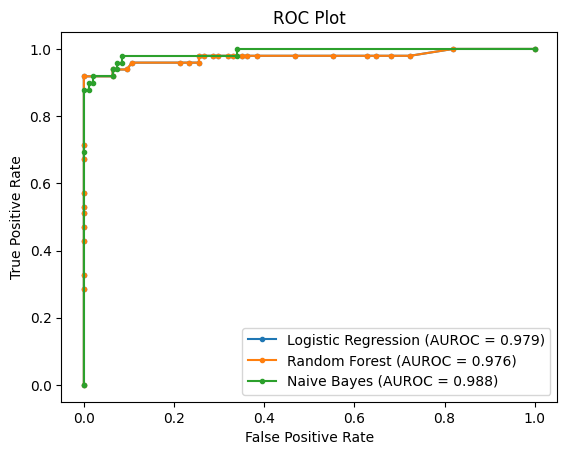

In [98]:
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)




plt.title('ROC Plot')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend() 

plt.show()

#Histogram

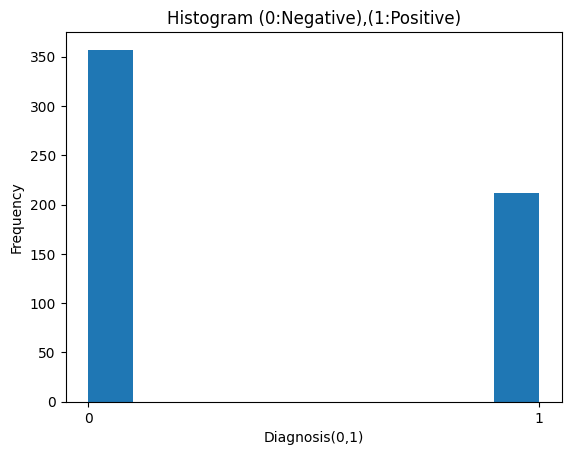

In [99]:
plt.hist(df.diagnosis)
plt.xlabel("Diagnosis(0,1)")
plt.ylabel("Frequency")
plt.xticks([0,1])    
plt.title("Histogram (0:Negative),(1:Positive)")
  


plt.show()